# Big Data Mart Sales Problem

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("BigDataMart_Test.csv")

In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print( train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [35]:
#Putting data into dat frame
ds=pd.DataFrame(data=data)
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.138000,1.0
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.422800,1.0
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.270000,1.0
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.380000,1.0
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.705200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233.0,10.50,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0,2181.288914,0.0
14200,308.0,7.60,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0,2181.288914,0.0
14201,1426.0,10.00,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0,2181.288914,0.0
14202,521.0,15.30,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0,2181.288914,0.0


# EDA

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  float64
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  float64
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  float64
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  float64
 9   Outlet_Location_Type       14204 non-null  float64
 10  Outlet_Type                14204 non-null  float64
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.4 MB


In [37]:
ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

There are null values in Item_Weight,Outlet_Size,Item_Outlet_Sales 

<AxesSubplot:>

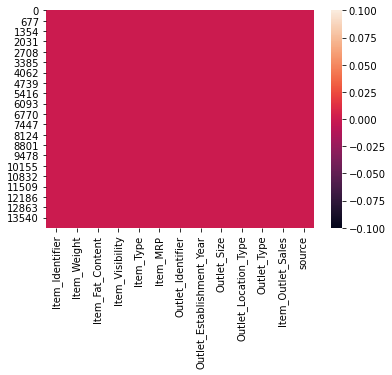

In [38]:
sns.heatmap(ds.isnull())

In [39]:
ds.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,780.193889,12.792854,1.369121,0.065953,7.229372,141.004977,4.722473,1997.830681,1.170867,1.112856,1.201281,2181.288914,0.600042
std,449.619658,4.234226,0.643300,0.051459,4.213471,62.086938,2.837101,8.371664,0.600306,0.812755,0.796543,1321.864430,0.489907
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000,0.000000
25%,391.000000,9.300000,1.000000,0.027036,4.000000,94.012000,2.000000,1987.000000,1.000000,0.000000,1.000000,1468.089000,0.000000
50%,782.000000,12.792854,1.000000,0.054021,6.000000,142.247000,5.000000,1999.000000,1.000000,1.000000,1.000000,2181.288914,1.000000
75%,1169.000000,16.000000,2.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,2.000000,2.000000,1.000000,2181.288914,1.000000
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800,1.000000


Key Observation: 1)The mean and median(50%) is similar in all the columns 2)There is good difference between 75% and max, in all the columns 3)Thers is large difference between 25% and min in all column. The observations 2 and 3 show that there may be extreme outliers presernt in the columns.

In [40]:
ds.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

In [41]:
#replacing missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
imd = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
ds['Item_Weight']=imp.fit_transform(data['Item_Weight'].values.reshape(-1,1))
ds['Item_Outlet_Sales']=imp.fit_transform(data['Item_Outlet_Sales'].values.reshape(-1,1))
ds['Outlet_Size']=imd.fit_transform(data['Outlet_Size'].values.reshape(-1,1))[:,0]
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.138000,1.0
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.422800,1.0
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.270000,1.0
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.380000,1.0
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.705200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233.0,10.50,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0,2181.288914,0.0
14200,308.0,7.60,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0,2181.288914,0.0
14201,1426.0,10.00,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0,2181.288914,0.0
14202,521.0,15.30,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0,2181.288914,0.0


<AxesSubplot:>

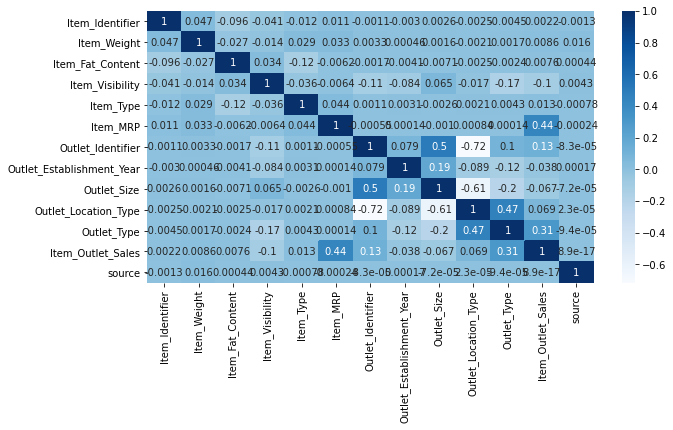

In [42]:
# Correlation Matrix ---Pearson Methos
fig =plt.figure(figsize=(10,5))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

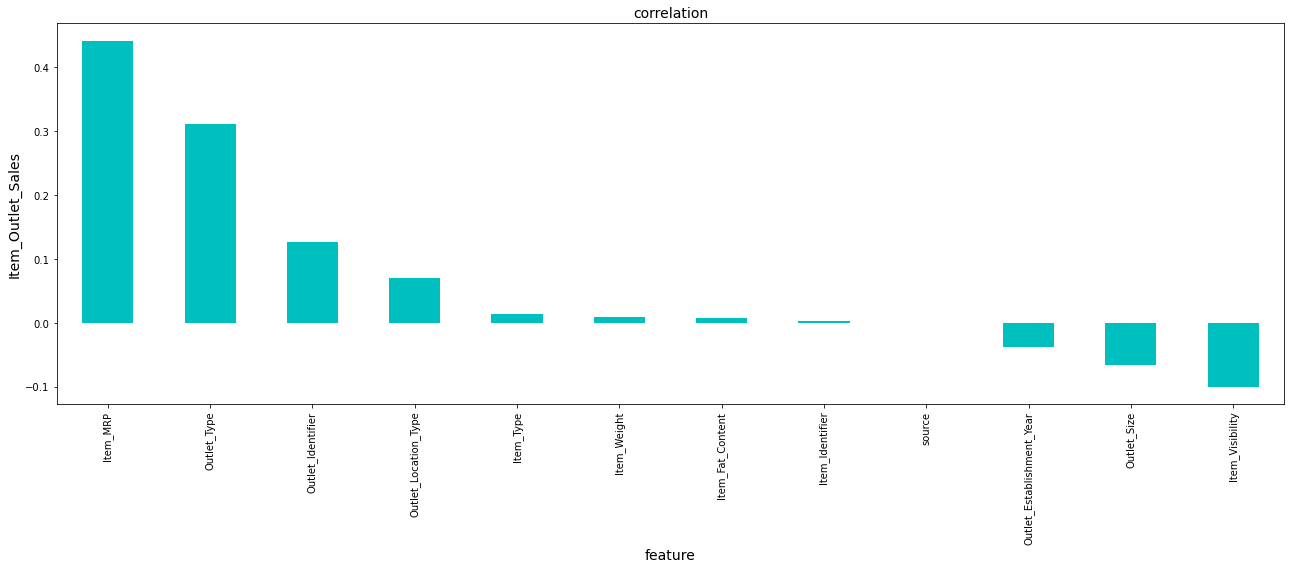

In [43]:
plt.figure(figsize=(22,7))
ds.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Item_Outlet_Sales',fontsize=14)
plt.title('correlation',fontsize =14)
plt.show()

Item_Identifier                 AxesSubplot(0.125,0.125;0.0503247x0.755)
Item_Weight                   AxesSubplot(0.18539,0.125;0.0503247x0.755)
Item_Fat_Content             AxesSubplot(0.245779,0.125;0.0503247x0.755)
Item_Visibility              AxesSubplot(0.306169,0.125;0.0503247x0.755)
Item_Type                    AxesSubplot(0.366558,0.125;0.0503247x0.755)
Item_MRP                     AxesSubplot(0.426948,0.125;0.0503247x0.755)
Outlet_Identifier            AxesSubplot(0.487338,0.125;0.0503247x0.755)
Outlet_Establishment_Year    AxesSubplot(0.547727,0.125;0.0503247x0.755)
Outlet_Size                  AxesSubplot(0.608117,0.125;0.0503247x0.755)
Outlet_Location_Type         AxesSubplot(0.668506,0.125;0.0503247x0.755)
Outlet_Type                  AxesSubplot(0.728896,0.125;0.0503247x0.755)
Item_Outlet_Sales            AxesSubplot(0.789286,0.125;0.0503247x0.755)
source                       AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

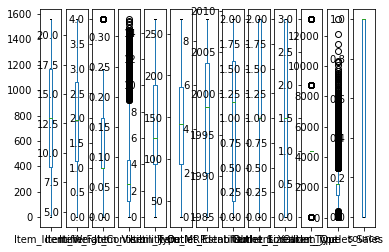

In [48]:
ds.plot(kind='box',subplots=True,layout=(1,13))

# Data Wrangling

In [49]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=oe.fit_transform(ds[i].values.reshape(-1,1))
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.138000,1.0
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.422800,1.0
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.270000,1.0
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.380000,1.0
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.705200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233.0,10.50,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0,2181.288914,0.0
14200,308.0,7.60,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0,2181.288914,0.0
14201,1426.0,10.00,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0,2181.288914,0.0
14202,521.0,15.30,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0,2181.288914,0.0


In [50]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(ds))
z
threshold=3
print(np.where(z>3))

(array([   43,    49,    55,    81,    83,   108,   130,   132,   145,
         146,   151,   174,   199,   203,   240,   243,   275,   276,
         304,   333,   337,   339,   373,   396,   402,   424,   434,
         456,   472,   489,   497,   502,   521,   532,   615,   640,
         641,   661,   694,   727,   753,   753,   809,   838,   844,
         854,   891,   903,   915,   935,   991,   997,  1009,  1010,
        1012,  1034,  1040,  1043,  1067,  1090,  1092,  1113,  1124,
        1127,  1133,  1138,  1159,  1183,  1209,  1254,  1272,  1291,
        1311,  1324,  1348,  1363,  1372,  1393,  1433,  1434,  1450,
        1496,  1501,  1506,  1512,  1542,  1549,  1560,  1564,  1565,
        1575,  1576,  1601,  1611,  1615,  1617,  1627,  1644,  1650,
        1651,  1658,  1669,  1684,  1700,  1705,  1709,  1710,  1723,
        1751,  1753,  1769,  1805,  1821,  1827,  1835,  1841,  1859,
        1879,  1987,  1996,  1998,  2040,  2062,  2088,  2107,  2109,
        2111,  2122

In [51]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 2 rows will be droped

shape before remooving the outliers: (14204, 13)
shape after remooving the outliers: (13589, 13)


In [52]:
dsnew.skew()

Item_Identifier             -0.009039
Item_Weight                  0.108511
Item_Fat_Content             0.283280
Item_Visibility              0.795155
Item_Type                    0.090975
Item_MRP                     0.148635
Outlet_Identifier           -0.066807
Outlet_Establishment_Year   -0.424572
Outlet_Size                 -0.089223
Outlet_Location_Type        -0.201609
Outlet_Type                  0.958001
Item_Outlet_Sales            0.786920
source                      -0.379494
dtype: float64

In [64]:
x = dsnew.drop(columns = ['Item_Outlet_Sales'])
y = dsnew['Item_Outlet_Sales']

In [65]:
x.shape

(13589, 12)

In [66]:
y.shape

(13589,)

In [67]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_new=sc.fit_transform(x)
x_new=pd.DataFrame(x,columns=x.columns)
x_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,1.0
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,1.0
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,1.0
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,1.0
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233.0,10.50,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0,0.0
14200,308.0,7.60,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0,0.0
14201,1426.0,10.00,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0,0.0
14202,521.0,15.30,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0,0.0


In [68]:
# To find the best random state using Decision Tree Regressor model

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.30,random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.21560136677208408 on random state 142


In [69]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9512, 12)
(4077, 12)
(9512,)
(4077,)


# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [71]:
# Linear Regression Model
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.28251795475770436

In [72]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.2882727726589067
mean absolute error 748.6268592670729
mean squarred error 932501.7907821538
Root mean square error 965.6613230228048


In [73]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

1.0

In [74]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.20352500498941906
mean absolute error 573.6083380917372
mean squarred error 1043537.9322711087
Root mean square error 1021.5370440033532


In [75]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9335020571642754

In [77]:
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.5424305063837436
mean absolute error 435.9558881108723
mean squarred error 599505.4788032651
Root mean square error 774.2773913806764


HyperParameter tuning

In [85]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(5,10),'criterion':['mse', 'mae']}

In [86]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=3)

In [87]:
#GCV.fit(x_train,y_train)

In [88]:
#GCV.best_params_

In [89]:
rf_final=RandomForestRegressor(max_depth=9,criterion='mse')
rf_final.fit(x_train,y_train)
rf_final.score(x_train,y_train)

0.6509790305442497

In [90]:
pred=rf_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.5772750902635873
mean absolute error 419.3978442569136
mean squarred error 553852.2627693629
Root mean square error 744.2125118333895


# Saving the best Mode

In [91]:
import joblib
joblib.dump(rf_final,'Model_BigMartSalesPrediction.obj')

['Model_BigMartSalesPrediction.obj']